In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
sns.set_theme(style='dark')
plt.style.use('ggplot')
sns.set_context('poster',font_scale=1)

dress=pd.read_csv('Womens Clothing E-Commerce Reviews-Copy1.csv')

In [2]:
type(dress)

pandas.core.frame.DataFrame

In [3]:
dress.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
dress.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [5]:
dress['Division Name'].replace(['Initmates'],['Intimate'],inplace = True)
dress

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Intimate,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [6]:
# filling the missing values
dress0={'General':{'Tops':['Knits','Blouses','Sweater','Fine Gauge','Dresses'],
                   ' Intimate':['Lounge','Swim','Legwear','Intimate','Layering','Chemises'],
                   'Bottoms':['Pants','Jeans','Skirts','Shorts','Casual Bottoms'],'Jackets':['Jackets','Outerwear'],
                   'Trend': ['Trend'],'Dresses':['Dresses']},
        'General Petite':{'Tops':['Knits','Blouses','Sweater','Fine Gauge','Dresses'],'Bottoms':['Pants','Jeans','Skirts','Shorts','Casual Bottoms'],
                   ' Intimate':['Lounge','Swim','Legwear','Intimate','Layering','Chemises'],
                   'Dresses':['Dresses'],'Jacket':['Jackets','Outerwear'],'Trend':['Trend']},
        'Initmates':{'Intimate':['Lounge','Swim','Legwear','Intimate','Layering','Chemises']}}


In [41]:
div = random.choice(list(dress0.keys()))
div

'General Petite'

In [42]:
dept = dress0[div]
dept = random.choice(list(dept.keys()))
dept

'Trend'

In [43]:
class_ = dress0[div][dept]
class_ = random.choice(list(class_))
print(class_)

Trend


In [48]:
class_ = dress0[div][dept]
class_ = random.choice(list(class_))
print(class_)

Outerwear


In [44]:
dress['Division Name']= dress['Division Name'].fillna(div)
dress['Department Name']= dress['Department Name'].fillna(dept)
dress['Class Name']= dress['Class Name'].fillna(class_)

In [ ]:
# Dropping of columns
dress.drop(axis=1, columns = 'Review Text', inplace = True)
dress.drop(axis=1, columns = 'Title', inplace = True)
dress.drop(axis=1, columns = 'Unnamed: 0', inplace = True)

In [47]:
ll=dress[['Division Name', 'Department Name']]
ll.groupby('Division Name')['Department Name'].value_counts()

Division Name   Department Name
General         Tops               6837
                Dresses            3730
                Bottoms            2542
                Jackets             645
                Trend                96
General Petite  Tops               3631
                Dresses            2589
                Bottoms            1257
                Jackets             387
                Intimate            233
                Trend                37
Intimate        Intimate           1502
Name: Department Name, dtype: int64

In [49]:
dress1 = dress[['Class Name','Rating','Recommended IND','Positive Feedback Count']]
dress1.groupby('Class Name').sum()

,Rating,Recommended IND,Positive Feedback Count
Class Name,,,
Blouses,12865,2509,8440
Casual bottoms,9,2,0
Chemises,4,1,0
Dresses,26229,5107,19510
Fine gauge,4687,921,2215
Intimates,659,132,120
Jackets,3024,595,1990
Jeans,5002,1011,2018
Knits,20155,3960,11598


In [ ]:
lm=dress[['Age','Class Name']]
ff=lm[lm['Age']>65]['Class Name'].value_counts()
ff

In [ ]:
plot1 =ff.plot(kind='bar',title='Clothes 65 and above women wear the most',colormap='icefire')
plt.savefig('plot0.png',dpi=150, bbox_inches='tight')

In [31]:
# people with Age 30 - 40 and cloth they buy the most 
tt=dress[(dress['Age']>=30)&(dress['Age']<=40)]['Class Name'].value_counts()

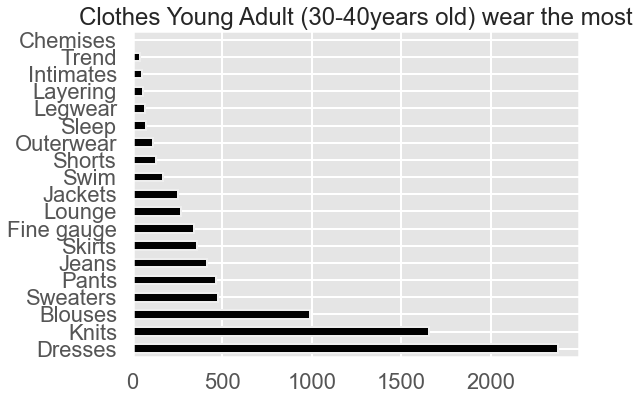

In [32]:
tt.plot(kind='barh', color='black',figsize=(8,6), title='Clothes Young Adult (30-40years old) wear the most')
plt.savefig('plot6.png')

<AxesSubplot:title={'center':'Clothes Young Adult (41 - 64) wear the most'}>

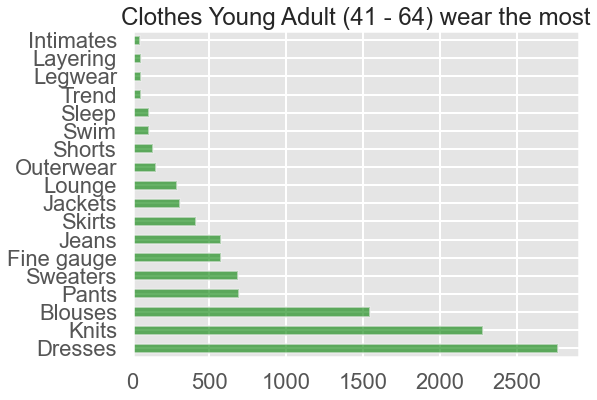

In [35]:
uu=dress[(dress['Age']>=41)&(dress['Age']<=64)]['Class Name'].value_counts()
uu.plot(kind='barh',color='green',figsize= (8,6), title = 'Clothes Young Adult (41 - 64) wear the most',alpha=0.6)

In [29]:
ggs=dress[dress['Age']<30]['Class Name'].value_counts()

<AxesSubplot:title={'center':'Clothes Youth (18-late 20s) wear the most'}>

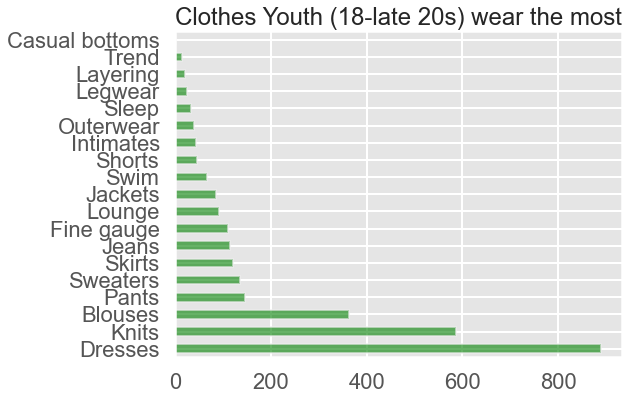

In [30]:
ggs.plot(kind='barh',color='green',figsize= (8,6), title='Clothes Youth (18-late 20s) wear the most',alpha=0.6)

<Figure size 1800x720 with 0 Axes>

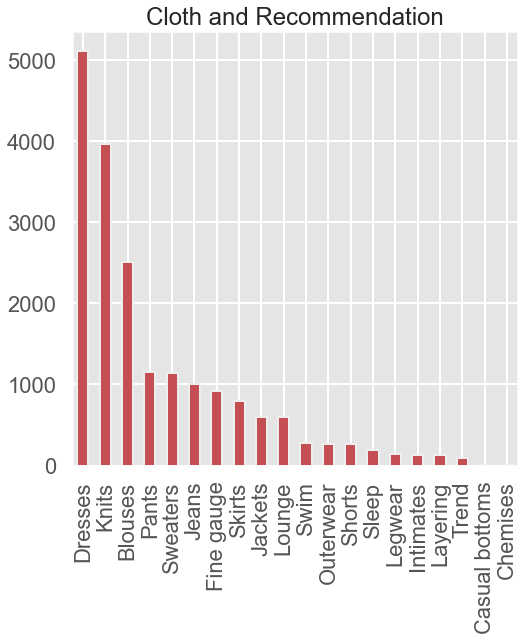

<Figure size 1800x720 with 0 Axes>

In [27]:
#Division that was higly Recommended
bb=dress[['Class Name','Recommended IND']]
bb= dress[dress['Recommended IND']==1]['Class Name']
bb.value_counts().plot(kind='bar',figsize=(8,8), color='r', alpha=1,title= 'Cloth and Recommendation')
plt.figure(figsize = (25, 10))

In [ ]:
bb=plt.subplot()

In [36]:
#TOP 5 rated clothes 
dress[dress['Rating']>2]['Class Name'].value_counts().head()

Dresses     5630
Knits       4337
Blouses     2749
Sweaters    1273
Pants       1264
Name: Class Name, dtype: int64

In [37]:
dress[dress['Rating']>2].sum()

Unnamed: 0                 247330764
Clothing ID                 19343832
Age                           911067
Rating                         94576
Recommended IND                19204
Positive Feedback Count        51441
dtype: int64

In [38]:
dress['Age'].min()

18

In [39]:
dress['Age'].max()

99

In [17]:
# top 5 rated cloths
gg=dress[['Rating','Class Name']]
dg=gg[gg['Rating']>2]['Class Name'].value_counts()
dg.head(30)

Dresses           5630
Knits             4337
Blouses           2749
Sweaters          1273
Pants             1264
Jeans             1062
Fine gauge         995
Skirts             860
Lounge             643
Jackets            631
Swim               312
Outerwear          292
Shorts             291
Sleep              203
Legwear            149
Intimates          139
Layering           135
Trend               97
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

<AxesSubplot:title={'center':'Division with most Rated Clothes'}>

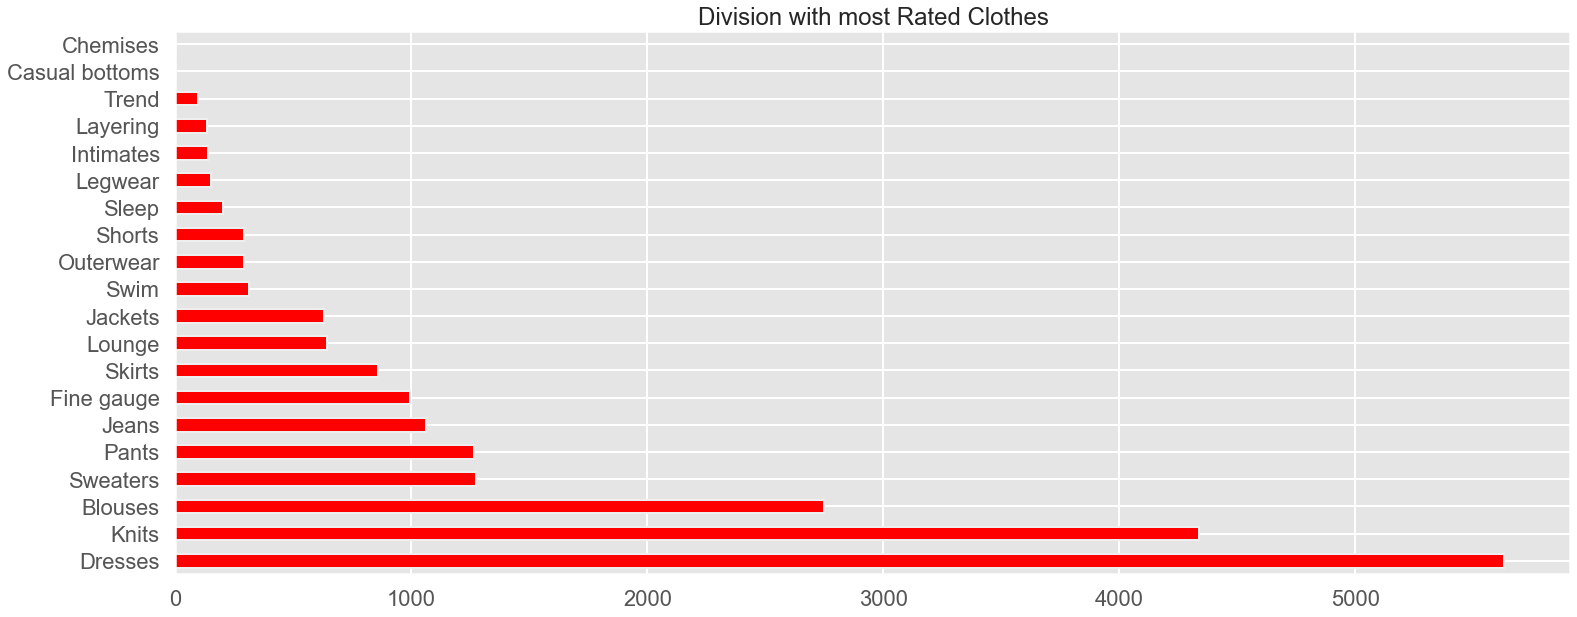

In [26]:
plt.figure(figsize = (25, 10))
dg.plot(kind='barh',color= 'red',title= 'Division with most Rated Clothes')
#plt.savefig('plot2.png',dpi=150, bbox_inches='tight')

In [ ]:
plt.savefig('PLOT2.png')

In [19]:
grp = dress.groupby('Class Name')
y= grp['Rating'].sum()
z= grp['Positive Feedback Count'].sum()
d=grp['Recommended IND'].sum()
plt.show()


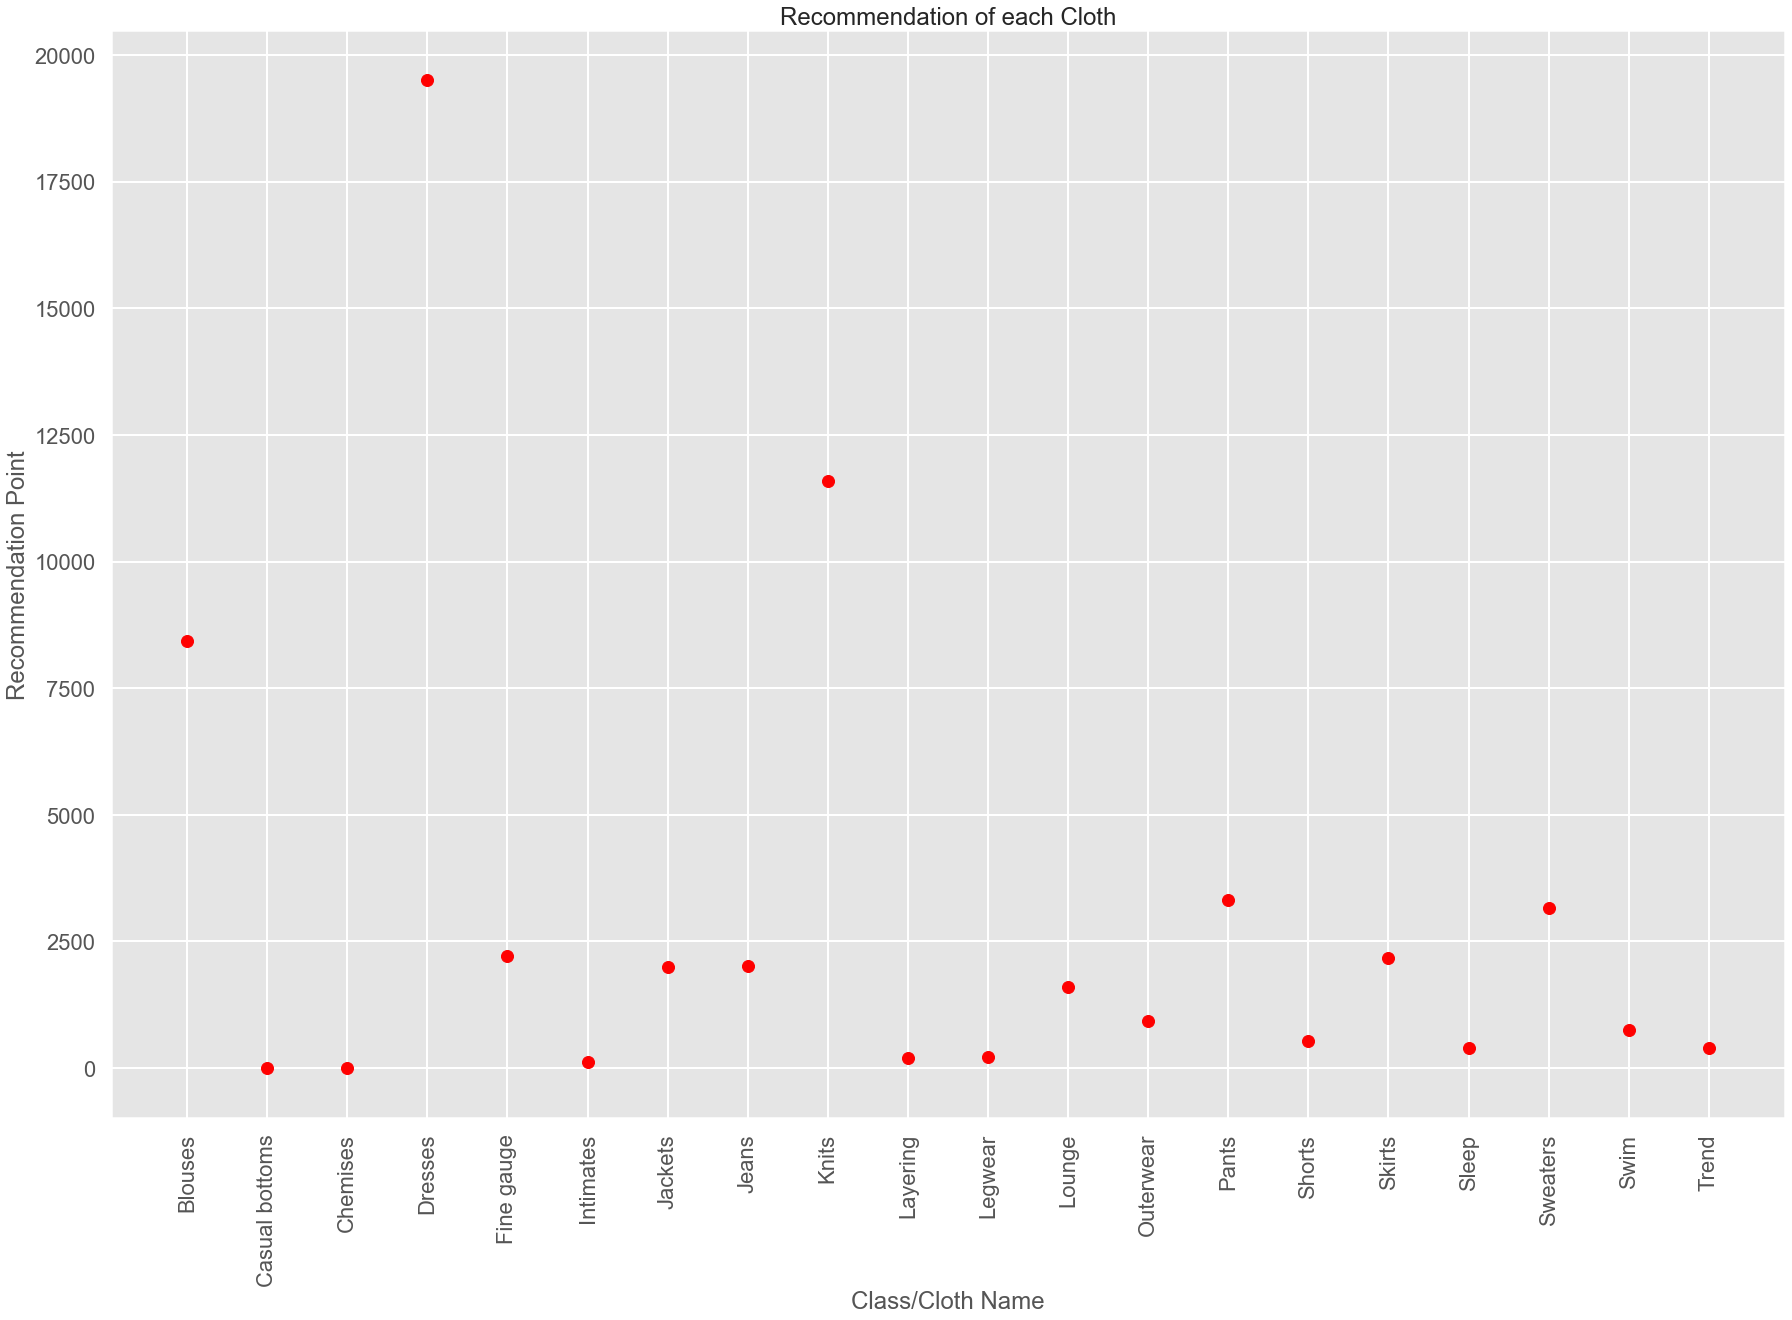

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(30,20))
plt.plot(z,'ro',color='red')
plt.xticks(rotation =90)
plt.title('Recommendation of each Cloth')
plt.ylabel('Recommendation Point')
plt.xlabel('Class/Cloth Name')
plt.show()
plt.savefig('plot6.pdf',dpi=150, bbox_inches='tight')

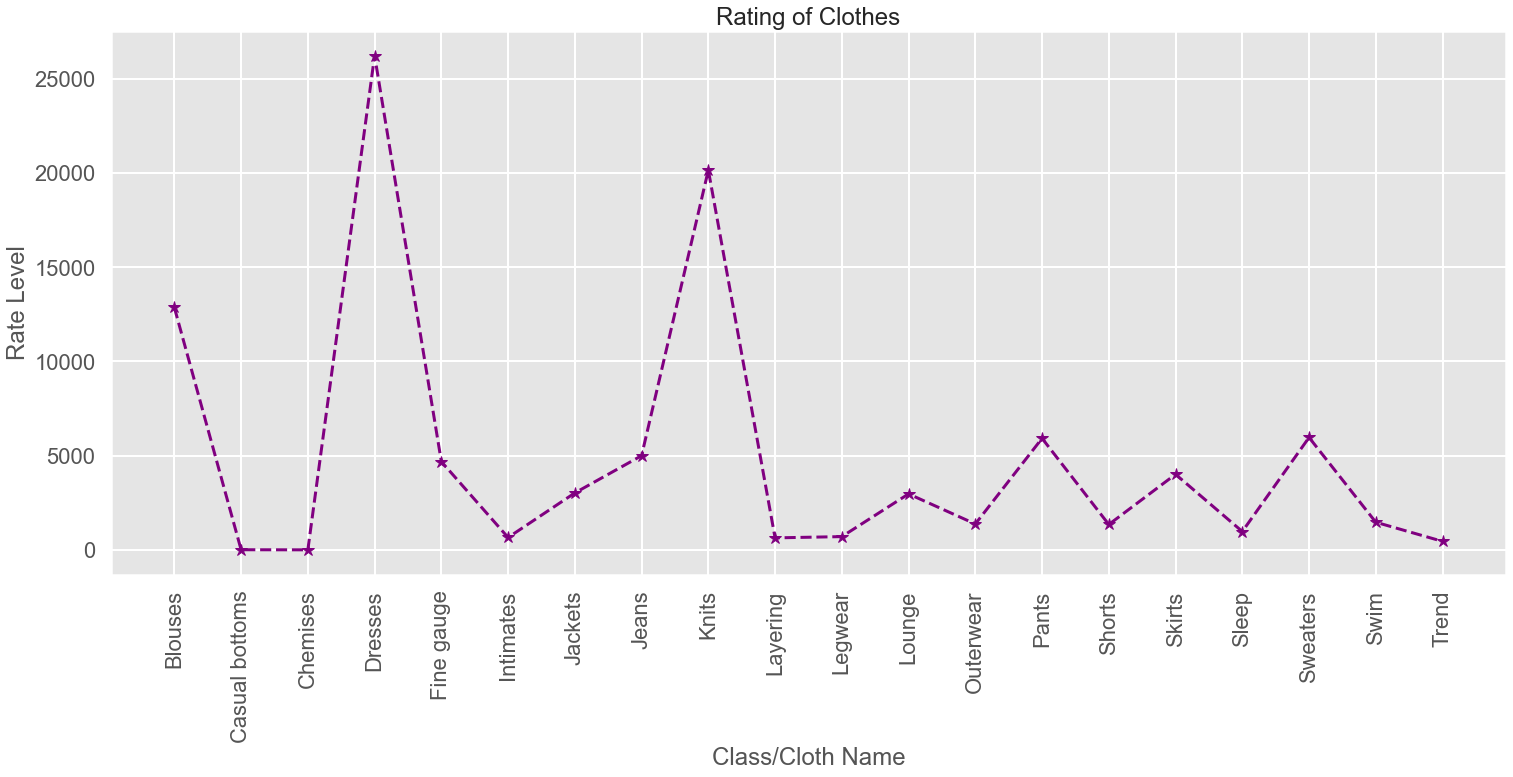

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure(figsize=(25,10))
plt.plot(y,'--*',color='purple')
plt.xticks(rotation =90)
plt.title('Rating of Clothes')
plt.ylabel('Rate Level')
plt.xlabel('Class/Cloth Name')
plt.show()
# saving the pics
plt.savefig('Rating of cloth.jpg')

In [ ]:
bb=dress[['Class Name','Recommended IND']].value_counts()

<AxesSubplot:>

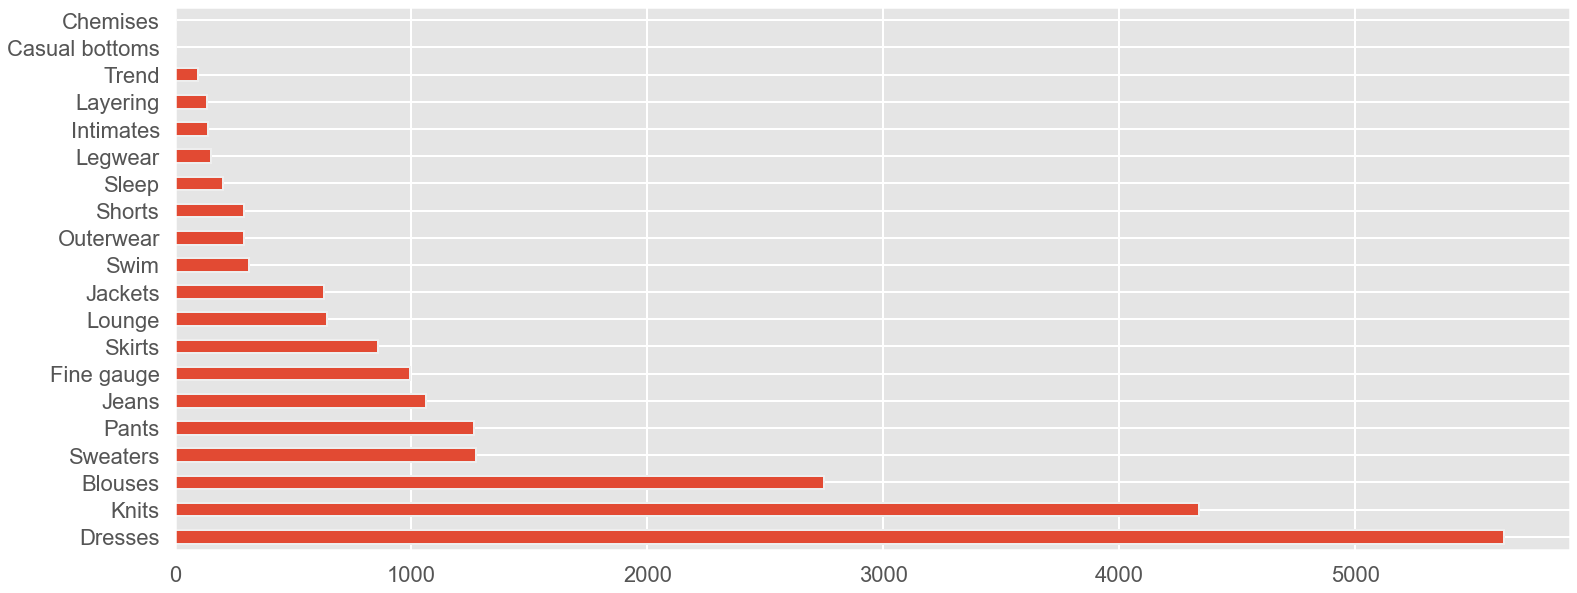

In [25]:
#cloth with most rated
plt.figure(figsize = (25, 10))
fl=dress[dress['Rating']>2]['Class Name'].value_counts()
fl
fl.plot(kind = 'barh')

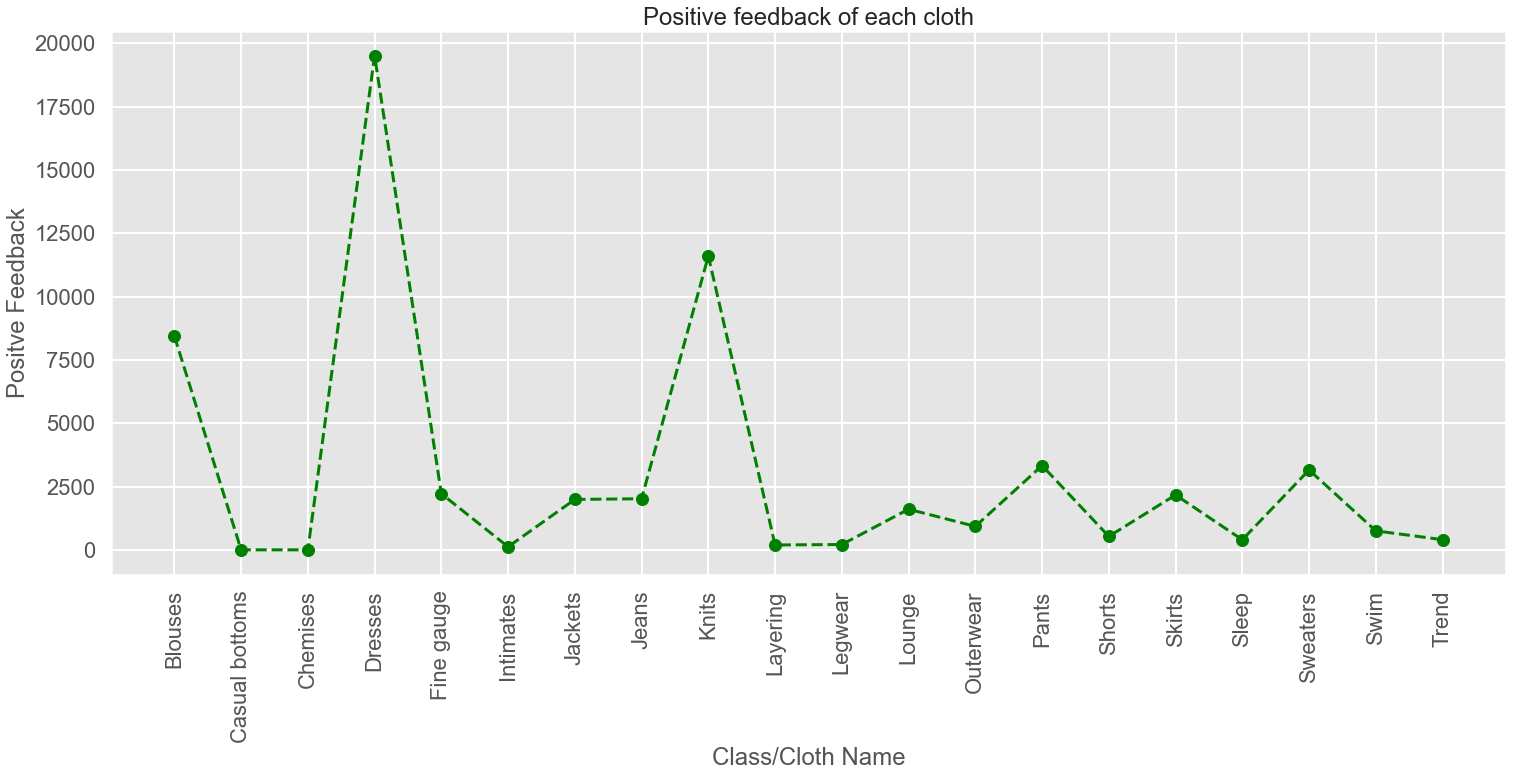

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(25,10))
plt.plot(z,'b--o',color='green')
plt.xticks(rotation =90)
plt.title('Positive feedback of each cloth')
plt.ylabel('Positve Feedback')
plt.xlabel('Class/Cloth Name')
plt.show()
plt.savefig('plot2.png', bbox_inches='tight')